# Python Part 3:  Pandas Example

### This notebook runs through an example using Pandas with the `jeopardy.csv` data.

**Data Source:**  200K+Jeopardy questions from [Reddit](https://www.reddit.com/r/datasets/comments/1uyd0t/200000_jeopardy_questions_in_a_json_file/)

---


## Part 1:  import libraries, check versions, set up preferences

In [1]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

In [2]:
# imports a library 'pandas', names it as 'pd'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

In [3]:
# check version of libraries
print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)

Pandas version: 0.19.2
Numpy version: 1.11.3


In [4]:
# confirming which version of Python I am using
import sys
print("Python Version:", sys.version)

Python Version: 2.7.13 |Anaconda custom (x86_64)| (default, Dec 20 2016, 23:05:08) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


In [5]:
# set various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

In [6]:
# check size of file; notice this is a bash command -- I can run it in the notebook!
!ls -l

total 3504
-rw-r--r--  1 suraj  staff    93133 May 17 13:02 1_pandas_jeopardy_example.ipynb
-rw-r--r--  1 suraj  staff    10382 May 17 13:02 2_pandas_olive_questions.ipynb
-rw-r--r--  1 suraj  staff  1651525 May  9 11:56 jeopardy.csv
-rw-r--r--  1 suraj  staff    28995 May  9 11:56 olive.csv


## Part 2:  read in the data

In [7]:
# read csv data into pandas dataframe
df_orig = pd.read_csv('jeopardy.csv', encoding="ISO-8859-1")

# Note: I normally don't need to specify encoding.  
# But, when I read in this csv file, there was an error.  
# I googled it; there are some different unicode types.  I tried a bunch and this worked.  

# Data formatting is unpredictable, and one of the skills in data science is to 'google' 
# and see how to work through data issues

## Part 3:  look at data
`df` = dataframe being used.  In our case, it is `df_orig`
```python
df.shape()
df.info()
df.head()
df.tail()
df.columns
df.values
df.dtype
```

In [8]:
# check dimensions of dataframe
# (rows, colums)
df_orig.shape

(10999, 7)

In [9]:
df_orig.head(3)

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/04,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/04,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/04,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona


## Part 4:  summarize data
```python
df.describe()
```

In [12]:
df_orig.describe()

,Show Number
count,10999.000
mean,4308.181
std,1397.758
min,62.000
25%,3409.000
50%,4541.000
75%,5431.000
max,6294.000


In [13]:
df_orig['Round'].describe()

count         10999
unique            3
top       Jeopardy!
freq           5434
Name: Round, dtype: object

In [12]:
# print the unique values of the column 'Round'
df_orig['Round'].unique()

array(['Jeopardy!', 'Double Jeopardy!', 'Final Jeopardy!'], dtype=object)

In [13]:
df_orig.groupby('Round').count()

,Show Number,Air Date,Category,Value,Question,Answer
Round,,,,,,
Double Jeopardy!,5382,5382,5382,5382,5382,5382
Final Jeopardy!,183,183,183,183,183,183
Jeopardy!,5434,5434,5434,5434,5434,5434


## Part 5:  create a new column

In [14]:
df_orig['Dollar_Amt'] = df_orig['Value']

## Part 6:  clean data

In [15]:
# remove the '$' in the column Dollar_Amt
df_orig['Dollar_Amt'].replace(regex=True,inplace=True,to_replace=r'\$',value=r'')

df_orig.head(3)

,Show Number,Air Date,Round,Category,Value,Question,Answer,Dollar_Amt
0,4680,12/31/04,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,200
1,4680,12/31/04,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,200
2,4680,12/31/04,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,200


In [16]:
# let's look at the tail end of the data
df_orig.tail(5)

,Show Number,Air Date,Round,Category,Value,Question,Answer,Dollar_Amt
10994,4362,7/15/03,Double Jeopardy!,BEFORE & AFTER,"$1,200","Liberator & king of Scotland who starred in ""D...",Robert the Bruce Willis,"1,200"
10995,4362,7/15/03,Double Jeopardy!,PEN NAMES,"$2,000","This pseudonym means ""2 fathoms deep""",Mark Twain,"2,000"
10996,4362,7/15/03,Double Jeopardy!,TELEVISION,"$1,600","She's the ""Night Court"" actress seen here",Markie Post,"1,600"
10997,4362,7/15/03,Double Jeopardy!,INVENTIVE MINDS,"$1,600",In 1952 he & Charles Bowman joined forces to d...,Orville Redenbacher,"1,600"
10998,4362,7/15/03,Double Jeopardy!,REFRESHER COURSE,"$1,600","Lemon juice, sugar, gin, club soda & an egg go...",royal gin fizz,"1,600"


In [17]:
# we need to do more cleaning.  There is a comma in the dollar amount
# remove the commas in the column 'Dollar_Amt'
# there are many ways to do it.  here's one:
df_orig['Dollar_Amt'] = df_orig['Dollar_Amt'].str.replace(',', '')
df_orig.tail(2)

,Show Number,Air Date,Round,Category,Value,Question,Answer,Dollar_Amt
10997,4362,7/15/03,Double Jeopardy!,INVENTIVE MINDS,"$1,600",In 1952 he & Charles Bowman joined forces to d...,Orville Redenbacher,1600
10998,4362,7/15/03,Double Jeopardy!,REFRESHER COURSE,"$1,600","Lemon juice, sugar, gin, club soda & an egg go...",royal gin fizz,1600


In [18]:
# create a new column which we want to be numeric
df_orig['Dollar_Amt_n'] = df_orig['Dollar_Amt']

In [19]:
# check data types
df_orig.dtypes

Show Number      int64
Air Date        object
Round           object
Category        object
Value           object
Question        object
Answer          object
Dollar_Amt      object
Dollar_Amt_n    object
dtype: object

In [20]:
df_orig['Dollar_Amt_n'].describe()

count     10999
unique       52
top         400
freq       2144
Name: Dollar_Amt_n, dtype: object

In [21]:
df_orig['Dollar_Amt_n'].unique()

array([u'200', u'400', u'600', u'800', u'2000', u'1000', u'1200', u'1600',
       u'3200', u'None', u'5000', u'100', u'300', u'500', u'1500', u'4800',
       u'1800', u'1100', u'2200', u'3400', u'3000', u'4000', u'6800',
       u'1900', u'3100', u'700', u'1400', u'2800', u'8000', u'6000',
       u'2400', u'12000', u'3800', u'2500', u'6200', u'10000', u'7000',
       u'1492', u'7400', u'1300', u'7200', u'2600', u'3300', u'5400',
       u'4500', u'2100', u'900', u'3600', u'2127', u'367', u'4400', u'3500'], dtype=object)

## Part 7:  change data type

In [22]:
df_orig['Dollar_Amt_n'] = pd.to_numeric(df_orig['Dollar_Amt_n'], errors='coerce')

In [23]:
df_orig['Dollar_Amt_n'].unique()

array([   200.,    400.,    600.,    800.,   2000.,   1000.,   1200.,
         1600.,   3200.,     nan,   5000.,    100.,    300.,    500.,
         1500.,   4800.,   1800.,   1100.,   2200.,   3400.,   3000.,
         4000.,   6800.,   1900.,   3100.,    700.,   1400.,   2800.,
         8000.,   6000.,   2400.,  12000.,   3800.,   2500.,   6200.,
        10000.,   7000.,   1492.,   7400.,   1300.,   7200.,   2600.,
         3300.,   5400.,   4500.,   2100.,    900.,   3600.,   2127.,
          367.,   4400.,   3500.])

In [24]:
# check data types
df_orig.dtypes

# notice Dollar_Amt_n is now type float64

Show Number       int64
Air Date         object
Round            object
Category         object
Value            object
Question         object
Answer           object
Dollar_Amt       object
Dollar_Amt_n    float64
dtype: object

In [24]:
# notice now we see summary statistics (rather than frequency counts for string data)
df_orig['Dollar_Amt_n'].describe()

count    10816.000
mean       761.001
std        643.154
min        100.000
25%        400.000
50%        600.000
75%       1000.000
max      12000.000
Name: Dollar_Amt_n, dtype: float64

## Part 8:  visualize data

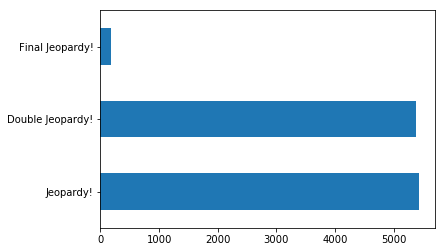

In [25]:
# do barplot of a categorical variable
df_orig['Round'].value_counts().plot('barh')

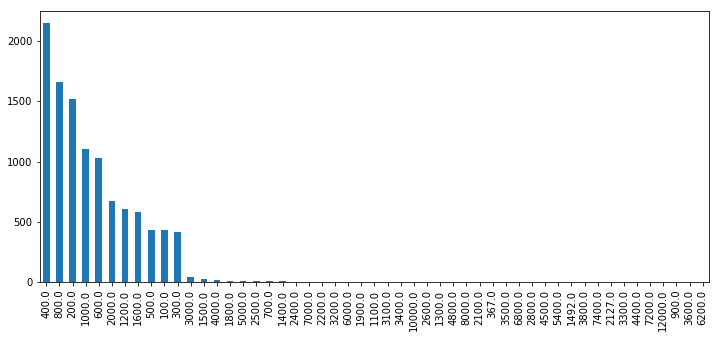

In [26]:
# do barplot of a numerical variable
fig = plt.figure(figsize=(12,5))

df_orig['Dollar_Amt_n'].value_counts().plot('bar')

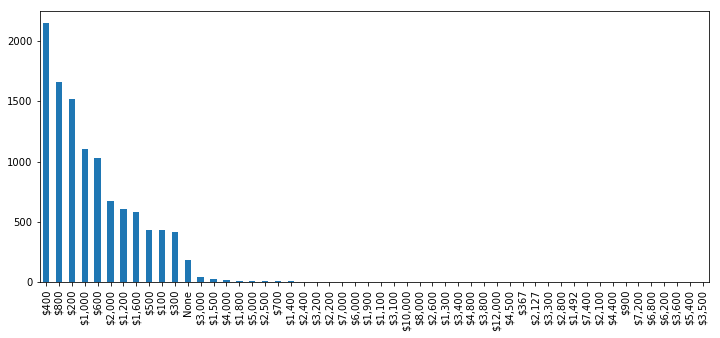

In [27]:
# do barplot of a categorical variable
fig = plt.figure(figsize=(12,5))

df_orig['Value'].value_counts().plot('bar')